<a href="https://colab.research.google.com/github/rudeboybert/SDS390/blob/master/PS/PS02_albert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 04

Instructions:
1. Name: Tint Tha Ra Wun
1. Create a new ChatGPT chat called "SDS390 PS04" that contains all the prompts you used for this problem set. **After you've completed your assignment**, click the share button and paste the URL in Markdown format [here](https://chat.openai.com/share/38ef54cb-931e-459d-b468-78d8611a5f4c).

Overview of this PS: You will be recreating graphs and explicitly computing values from "FPP 7 and 8 - The forecaster's toolbox" in python.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# Load and explore data

## US Consumption
Load and wrangle the us_consumption data set, explore the raw values, and plot the time series in an informative fashion.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 198 entries, 1970-01-01 to 2019-04-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Consumption   198 non-null    float64
 1   Income        198 non-null    float64
 2   Production    198 non-null    float64
 3   Savings       198 non-null    float64
 4   Unemployment  198 non-null    float64
dtypes: float64(5)
memory usage: 9.3 KB
None
            Consumption    Income  Production   Savings  Unemployment
Quarter                                                              
1970-01-01     0.618566  1.044801   -2.452486  5.299014           0.9
1970-04-01     0.451984  1.225647   -0.551459  7.789894           0.5
1970-07-01     0.872872  1.585154   -0.358652  7.403984           0.5
1970-10-01    -0.271848 -0.239545   -2.185691  1.169898           0.7
1971-01-01     1.901345  1.975925    1.909764  3.535667          -0.1


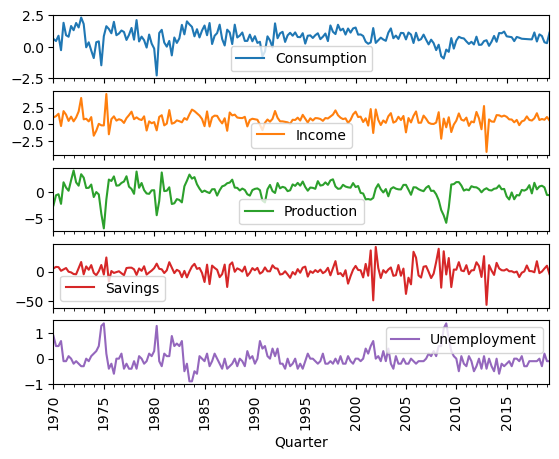

In [3]:
#load dataset
us_consumption = pd.read_csv("us_consumption.csv", parse_dates = ['Quarter'], index_col ='Quarter')

#view dataset
print(us_consumption.info())
print(us_consumption.head())

#plot timeseries
us_consumption.plot(subplots = True)
plt.xticks(rotation=90) 
plt.show()

## Algeria Exports

Load and wrangle the Algeria economy data set, explore the raw values, and plot the time series in an informative fashion.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58 entries, 1960-01-01 to 2017-01-01
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     58 non-null     object 
 1   Code        58 non-null     object 
 2   GDP         58 non-null     float64
 3   Growth      57 non-null     float64
 4   CPI         49 non-null     float64
 5   Imports     58 non-null     float64
 6   Exports     58 non-null     float64
 7   Population  58 non-null     int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 4.1+ KB
None
            Country Code           GDP     Growth  CPI    Imports    Exports  \
Year                                                                           
1960-01-01  Algeria  DZA  2.723649e+09        NaN  NaN  67.143632  39.043173   
1961-01-01  Algeria  DZA  2.434777e+09 -13.605441  NaN  67.503771  46.244557   
1962-01-01  Algeria  DZA  2.001469e+09 -19.685042  NaN  20.818647  19.793873   
1

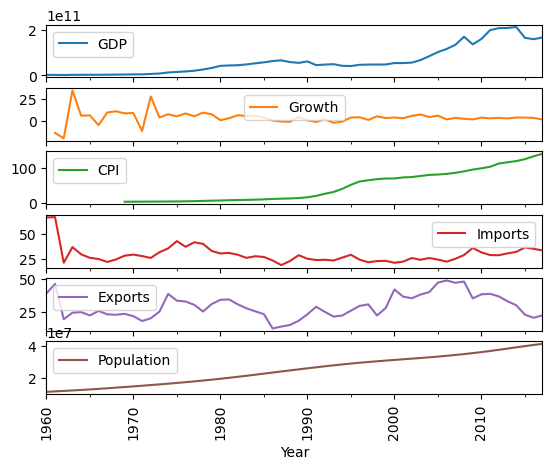

In [4]:
#load dataset
algeria_economy = pd.read_csv("algeria_economy.csv", parse_dates = ['Year'], index_col ='Year')

#view dataset
print(algeria_economy.info())
print(algeria_economy.head())

#plot timeseries
algeria_economy.plot(subplots = True)
plt.xticks(rotation=90) 
plt.show()

## Australia Population

Load and wrangle the Australia economy data set, explore the raw values, and plot the time series in an informative fashion.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 1960 to 2017
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     58 non-null     object 
 1   Code        58 non-null     object 
 2   GDP         58 non-null     float64
 3   Growth      57 non-null     float64
 4   CPI         58 non-null     float64
 5   Imports     58 non-null     float64
 6   Exports     58 non-null     float64
 7   Population  58 non-null     int64  
 8   Pop         58 non-null     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 4.5+ KB
None
        Country Code           GDP    Growth       CPI    Imports    Exports  \
Year                                                                           
1960  Australia  AUS  1.857319e+10       NaN  7.960458  14.061746  12.994452   
1961  Australia  AUS  1.964834e+10  2.485605  8.142560  15.025080  12.403101   
1962  Australia  AUS  1.988801e+10  1.296478  8.116545 

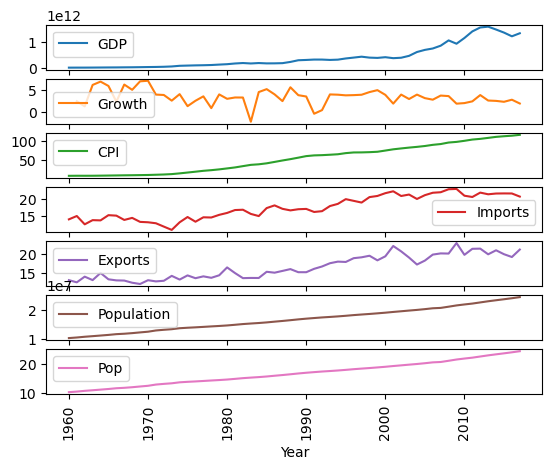

In [5]:
#load dataset
aus_economy = pd.read_csv("aus_economy.csv", index_col = 'Year')

#view dataset
print(aus_economy.info())
print(aus_economy.head())

#plot timeseries
aus_economy.plot(subplots = True)
plt.xticks(rotation=90) 
plt.show()

## Australia Tourism

Load and wrangle the Australia Holidays data set, explore the raw values, and plot the time series in an informative fashion.

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 1998-01-01 to 2017-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Trips   80 non-null     float64
dtypes: float64(1)
memory usage: 1.2+ KB
None
                   Trips
Quarter                 
1998-01-01  1.180604e+07
1998-04-01  9.275662e+06
1998-07-01  8.642489e+06
1998-10-01  9.299524e+06
1999-01-01  1.117203e+07
...                  ...
2016-10-01  1.008496e+07
2017-01-01  1.240642e+07
2017-04-01  1.047120e+07
2017-07-01  1.049917e+07
2017-10-01  1.121082e+07

[80 rows x 1 columns]


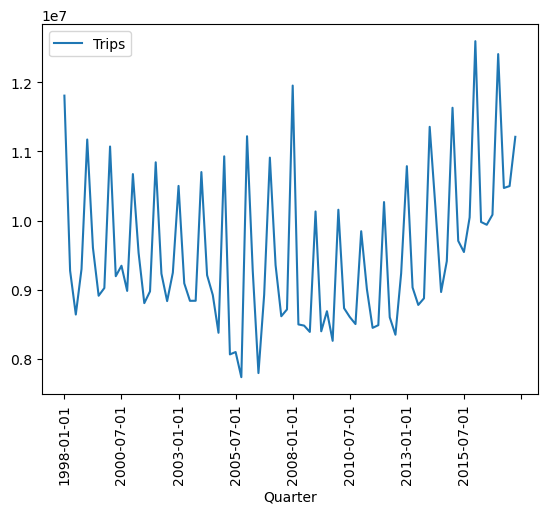

In [54]:
#load dataset
aus_holidays = pd.read_csv("aus_holidays.csv", index_col='Quarter')

#view dataset
print(aus_holidays.info())
print(aus_holidays)

#plot timeseries
aus_holidays.plot(subplots = True)
plt.xticks(rotation=90) 
plt.show()

# Time Series Regression Model
- FPP 7.2 - Simple exponential smoothing: Recreate [Fig 7.6](https://otexts.com/fpp3/least-squares.html#fig:usfitted1)

In [7]:
dependent_variable = us_consumption['Consumption']
independent_variables = us_consumption[['Income', 'Production', 'Savings', 'Unemployment']]

# Add a constant term to the independent variables
independent_variables = sm.add_constant(independent_variables)

# Fit the OLS model
model = sm.OLS(dependent_variable, independent_variables).fit()

#Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Consumption   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     160.0
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           3.93e-60
Time:                        22:18:58   Log-Likelihood:                -46.660
No. Observations:                 198   AIC:                             103.3
Df Residuals:                     193   BIC:                             119.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2531      0.034      7.343   

In [8]:
#Extract fitted_values 
fitted_values = model.fittedvalues
us_consumption['fitted_values'] = fitted_values

#view dataset
print(us_consumption.info())
print(us_consumption.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 198 entries, 1970-01-01 to 2019-04-01
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Consumption    198 non-null    float64
 1   Income         198 non-null    float64
 2   Production     198 non-null    float64
 3   Savings        198 non-null    float64
 4   Unemployment   198 non-null    float64
 5   fitted_values  198 non-null    float64
dtypes: float64(6)
memory usage: 10.8 KB
None
            Consumption    Income  Production   Savings  Unemployment  \
Quarter                                                                 
1970-01-01     0.618566  1.044801   -2.452486  5.299014           0.9   
1970-04-01     0.451984  1.225647   -0.551459  7.789894           0.5   
1970-07-01     0.872872  1.585154   -0.358652  7.403984           0.5   
1970-10-01    -0.271848 -0.239545   -2.185691  1.169898           0.7   
1971-01-01     1.901345  1.975925    1.90

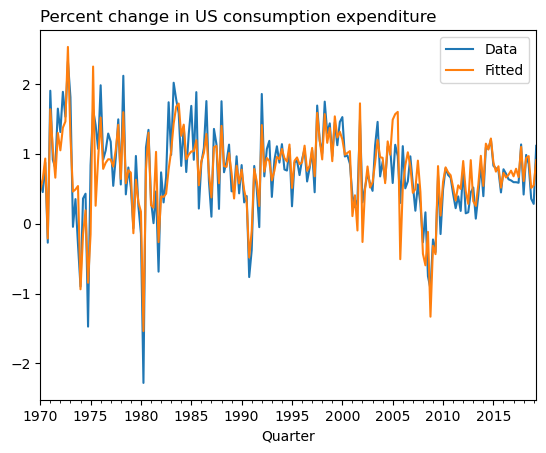

In [9]:
#Make figure 7.6 
ax = us_consumption.plot(y=['Consumption', 'fitted_values'])
plt.xlabel('Quarter')
plt.legend(['Data', 'Fitted'])
ax.set_title('Percent change in US consumption expenditure', loc='left')
plt.show()

# Simple Exponential Smoothing
- FPP 8.1 - Simple exponential smoothing: Recreate [Fig 8.2](https://otexts.com/fpp3/ses.html#fig:ses)
- You only need to plot the forecasts into the future. The fitted values for observed time points is optional.
- Do the plot without forecasting/error bands as an MVP. Optional: include the forecasting/error bands.

,Simple Exponential Smoothing
$\alpha$,0.840000
$\beta$,NaN
$\phi$,NaN
$l_0$,36.694093
$b_0$,NaN
SSE,2003.587409


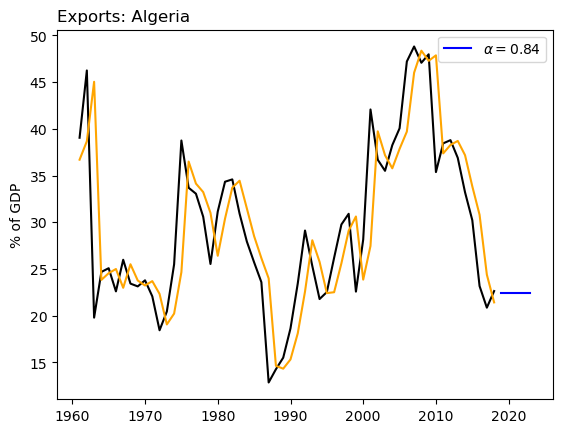

In [21]:
#cite: https://www.statsmodels.org/stable/examples/notebooks/generated/exponential_smoothing.html

#set index range 
algeria_economy.index = pd.date_range(start='1960', end='2018', freq='A')

#select columns and create series 
data = algeria_economy['Exports']
index = algeria_economy.index
exports = pd.Series(data, index)

#fit SES model 
fit1 = SimpleExpSmoothing(exports, initialization_method="estimated").fit(smoothing_level=0.84, optimized=False)
#forecast
fcast1 = fit1.forecast(5).rename(r"$\alpha=0.84$") 

plt.plot(exports, color="black") #plot original data
plt.plot(fit1.fittedvalues, color="orange") #plot fitted 
(line1,) = plt.plot(fcast1, color="blue") #plot forecase
plt.legend([line1], [fcast1.name]) #set legend
plt.title('Exports: Algeria', loc='left') #set title
plt.ylabel('% of GDP') #set y-label

#observe parameter values
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "initial_level",
    "initial_trend",
]
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$l_0$", "$b_0$", "SSE"],
    columns=["Simple Exponential Smoothing"],
)
results["Simple Exponential Smoothing"] = [fit1.params[p] for p in params] + [fit1.sse]
results

# Exponential smoothing with trend
- FPP 8.2 - Exponential smoothing with trend: Recreate [Fig 8.4](https://otexts.com/fpp3/holt.html#fig:dampedtrend)
- You only need to plot the forecasts into the future. The fitted values for observed time points is optional.
- Do the plot without forecasting/error bands as an MVP. Optional: include the forecasting/error bands.
- Optional: include a dampening effect (parameter $\phi$ from Lec 12.1) 

,Holt's,Additive Damped Holt's
$\alpha$,1.000000,1.000000
$\beta$,0.326700,0.326700
$\phi$,NaN,0.900000
$l_0$,10.067191,10.067191
$b_0$,0.219210,0.219210
SSE,0.223389,0.485568


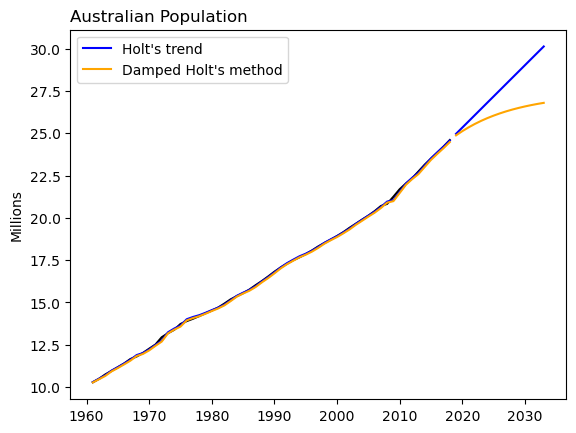

In [90]:
#set index range 
aus_economy.index = pd.date_range(start='1960', end='2018', freq='A')

#select columns and create series 
pop = aus_economy['Pop']
index = aus_economy.index
exports = pd.Series(data, index)

#fit model for Holt's
fit1 = Holt(pop, initialization_method="estimated").fit(smoothing_level=1, smoothing_trend=0.3267, optimized=False)
#forecast Holt's
fcast1 = fit1.forecast(15).rename("Holt's trend")
#fit model for Damped Holt's 
fit3 = Holt(pop, damped_trend=True, initialization_method="estimated").fit(smoothing_level=1, smoothing_trend=0.3267, damping_trend=0.9, optimized=False)
#forecase damped Holt's 
fcast3 = fit3.forecast(15).rename("Damped Holt's method")

plt.plot(pop, color="black") #plot original data
plt.plot(fit1.fittedvalues, color="blue") #plot fitted values for Holt's 
(line1,) = plt.plot(fcast1, color="blue") #plot forecast for Holt's 
plt.plot(fit3.fittedvalues, color="orange") #plot fitted for Additive Damped
(line3,) = plt.plot(fcast3, color="orange") #plot forecase for Additive Damped
plt.legend([line1, line3], [fcast1.name, fcast3.name]) #set legend
plt.title('Australian Population', loc='left') #set title
plt.ylabel('Millions') #set label

In [ ]:
#observe parameter values
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "initial_level",
    "initial_trend",
]
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$l_0$", "$b_0$", "SSE"],
    columns=["Holt's", "Additive Damped Holt's"],
)
results["Holt's"] = [fit1.params[p] for p in params] + [fit1.sse]
results["Additive Damped Holt's"] = [fit3.params[p] for p in params] + [fit3.sse]
results

# Exponential smoothing with seasonality
- FPP 8.3 - Exponential smoothing with seasonality: Recreate [Fig 8.7](https://otexts.com/fpp3/holt-winters.html#fig:7-HW)
- You only need to plot the forecasts into the future. The fitted values for observed time points is optional.
- Include only the additive model
- Do the plot without forecasting/error bands as an MVP. Optional: include the forecasting/error bands.

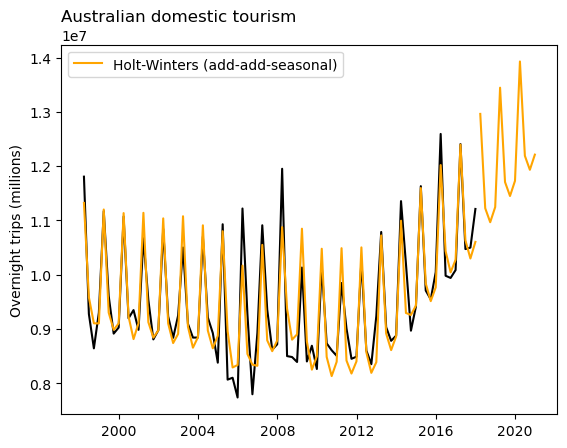

In [110]:
#set date range
aus_holidays.index = pd.date_range(start='1998-01-01', end='2018-01-01 ', freq='Q')

#fit model for add seasonal 
fit1 = ExponentialSmoothing(aus_holidays['Trips'],
                            trend="add", 
                            seasonal="add", 
                            seasonal_periods=4).fit(smoothing_level = 0.2620, smoothing_trend = 0.1646, smoothing_seasonal = 0.0001)
#create forecast for add seasonal
fcast1 = fit1.forecast(12).rename("Holt-Winters (add-add-seasonal)") 

plt.plot(aus_holidays['Trips'], color="black") #plot original data
plt.plot(fit1.fittedvalues, color="orange") #plot fitted values
(line1,) = plt.plot(fcast1, color="orange") #plot forecast values
plt.legend([line1], [fcast1.name]) #set legend
plt.title('Australian domestic tourism', loc='left') #set title
plt.ylabel('Overnight trips (millions)') #set label
plt.show()

/Users/tinttharawun/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


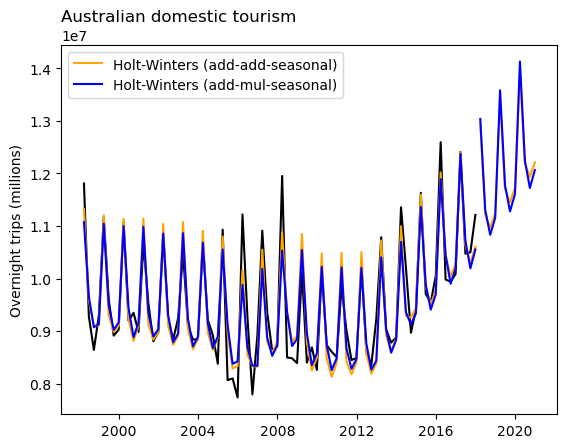

In [109]:
#set date range
aus_holidays.index = pd.date_range(start='1998-01-01', end='2018-01-01 ', freq='Q')

#fit add seasonal
fit1 = ExponentialSmoothing(aus_holidays['Trips'],
                            initialization_method="estimated",
                            trend="add", 
                            seasonal="add", 
                            seasonal_periods=4).fit(smoothing_level = 0.2620, smoothing_trend = 0.1646, smoothing_seasonal = 0.0001)
#fit mul seasonal
fit2 = ExponentialSmoothing(aus_holidays,
                            initialization_method="estimated",
                            trend="add",
                            seasonal="mul",
                            seasonal_periods=4,).fit(smoothing_level = 0.2237, smoothing_trend = 0.1360, smoothing_seasonal = 0.0001
 )
#forecast 3 years for add seasonal
fcast1 = fit1.forecast(12).rename("Holt-Winters (add-add-seasonal)") 
#forecast for mul seasonal
fcast2 = fit2.forecast(12).rename("Holt-Winters (add-mul-seasonal)") 

plt.plot(aus_holidays['Trips'], color="black") #plot original data
plt.plot(fit1.fittedvalues, color="orange") #plot fitted values for add seasonal
(line1,) = plt.plot(fcast1, color="orange") #plot forecast values for mul seasonal
plt.plot(fit2.fittedvalues, color="blue") #plot fitted values for mul seasonal
(line2,) = plt.plot(fcast2, color="blue") #plot forecast values for mul seasonal
plt.legend([line1, line2], [fcast1.name, fcast2.name]) #set legend
plt.title('Australian domestic tourism', loc='left') #set title
plt.ylabel('Overnight trips (millions)') #set label
plt.show()

In [111]:
#observe parameter values
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
results["Additive"] = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results

,Additive,Multiplicative
$\alpha$,2.620000e-01,2.237000e-01
$\beta$,1.646000e-01,1.360000e-01
$\phi$,NaN,NaN
$\gamma$,1.000000e-04,1.000000e-04
$l_0$,9.766128e+06,9.704029e+06
$b_0$,-2.779192e+04,-1.042354e+04
SSE,1.374671e+13,1.505883e+13
